In [13]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Data Loaded Successfully!
                                              review  rating      product  \
0  Absolutely love this product! The quality is e...       5  electronics   
1  Great value for money. The battery life is ama...       5  electronics   
2  The dress fits perfectly and the material is v...       4     clothing   
3  Terrible product! Stopped working after just 2...       1  electronics   
4  Poor quality material. The size was completely...       2     clothing   

   helpful_votes  
0             12  
1              8  
2             15  
3             23  
4             18  

✅ Sentiment Analysis Completed!

                                              review  compound_score sentiment
0  Absolutely love this product! The quality is e...          0.8016  Positive
1  Great value for money. The battery life is ama...          0.9080  Positive
2  The dress fits perfectly and the material is v...          0.8313  Positive
3  Terrible product! Stopped working after ju

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8508\3950987803.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


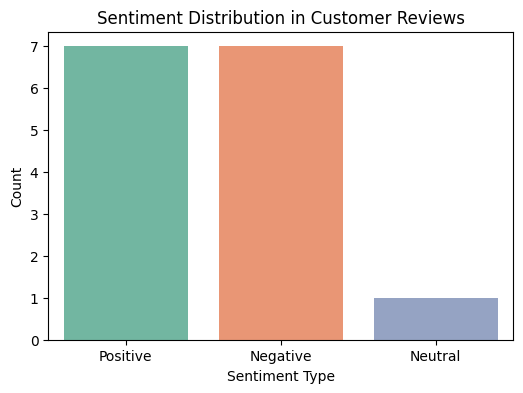


📁 Results saved successfully as 'Sentiment_Analysis_Results.csv'


In [ ]:
# Import Libraries
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load Dataset
with open(r"C:\Users\ASUS\Downloads\sample_reviews.txt", "r", encoding="utf-8") as f:
    content = f.read()

content = content.split("=", 1)[1].strip()
sample_reviews = ast.literal_eval(content)

df = pd.DataFrame(sample_reviews)
print("✅ Data Loaded Successfully!")
print(df.head())

# Clean the Text
def clean_text(text):
    text = re.sub('[^a-zA-Z ]', '', text)
    text = text.lower().strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)

# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

df['compound_score'] = df['clean_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment'] = df['compound_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

print("\n✅ Sentiment Analysis Completed!\n")
print(df[['review', 'compound_score', 'sentiment']].head())


# Sentiment Count Visualization

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution in Customer Reviews")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

# Save Results
df.to_csv("Sentiment_Analysis_Results.csv", index=False)
print("\n📁 Results saved successfully as 'Sentiment_Analysis_Results.csv'")
